## Analiza skupa podataka *Diamonds*


Ukratko o skupu podataka:
 Skup podataka sadrzi fizicke atribute i cene 53940 dijamanata.

 Atributi (10):  

>* price: Cena u US dolarima.   (326 USD--18,823 USD)  
>* carat: Tezina dijamanta.   (0.2--5.01)  
>* cut: Kvalitet reza.   (Fair, Good, Very Good, Premium, Ideal)  
>* color: Boja dijamanta.   od D (najbolje) do J (najgore)  
>* clarity: Cistoca dijamanta.   (I1 (najgore), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (najbolje))  
>* x: Duzina u mm.   (0--10.74)  
>* y: Sirina u mm.   (0--58.9)  
>* z: Dubina mm.    (0--31.8)  
>* depth: 100 * z / mean(x, y).   (43--79)   
>* table: Sirina vrha dijamanta u odnosu na najsiru tacku.   (43--95)  

Homepage: https://ggplot2.tidyverse.org/reference/diamonds.html

Source code: tfds.structured.diamonds.Diamonds  
Versions: 1.0.0 (default): Initial release.  
Download size: 2.64 MiB  
Dataset size: 13.01 MiB  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load('diamonds', split='all')
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incompleteM6TGKL/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'features': {'carat': TensorSpec(shape=(), dtype=tf.float32, name=None), 'clarity': TensorSpec(shape=(), dtype=tf.int64, name=None), 'color': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cut': TensorSpec(shape=(), dtype=tf.int64, name=None), 'depth': TensorSpec(shape=(), dtype=tf.float32, name=None), 'table': TensorSpec(shape=(), dtype=tf.float32, name=None), 'x': TensorSpec(shape=(), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(), dtype=tf.float32, name=None), 'z': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'price': TensorSpec(shape=(), dtype=tf.float32, name=None)}>


In [3]:
data = tfds.as_dataframe(ds)
type(data)

tensorflow_datasets.core.as_dataframe.StyledDataFrame

In [4]:
data.shape

(53940, 10)

In [5]:
data.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   features/carat    53940 non-null  float32
 1   features/clarity  53940 non-null  int64  
 2   features/color    53940 non-null  int64  
 3   features/cut      53940 non-null  int64  
 4   features/depth    53940 non-null  float32
 5   features/table    53940 non-null  float32
 6   features/x        53940 non-null  float32
 7   features/y        53940 non-null  float32
 8   features/z        53940 non-null  float32
 9   price             53940 non-null  float32
dtypes: float32(7), int64(3)
memory usage: 2.7 MB


### Osnovne statistike

In [6]:
diamonds = pd.DataFrame(data)
diamonds

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0


In [7]:
diamonds.describe()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.051020,2.594197,2.904097,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799805
std,0.474011,1.647136,1.701105,1.116600,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439697
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,3.000000,3.000000,3.000000,61.799999,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,4.000000,4.000000,4.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,7.000000,6.000000,4.000000,79.000000,95.000000,10.740000,58.900002,31.799999,18823.000000


Imena atributa imaju prefiks "features/" sto je nepotrebno pa cemo atribute preimenovati i nove nazive dodeliti skupu podataka

In [8]:
def rename_features(features):

  features.remove('price')
  new_features = []
  for f in features:
    new_features.append(f[9:])
  new_features.append('price')

  return new_features

In [9]:
old_feature_names = diamonds.columns.to_list()
old_feature_names

['features/carat',
 'features/clarity',
 'features/color',
 'features/cut',
 'features/depth',
 'features/table',
 'features/x',
 'features/y',
 'features/z',
 'price']

In [10]:
feature_names = rename_features(old_feature_names)
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'price']

In [11]:
diamonds.columns = feature_names
diamonds.head()

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Moze se primetiti da kolone *clarity*, *color* i *cut* imaju brojne vrednosti, a u pitanju su kategoricki atributi, kao sto pise u opisu podataka sa sajta: https://ggplot2.tidyverse.org/reference/diamonds.html

In [12]:
diamonds['clarity'].value_counts()

2    13065
3    12258
1     9194
4     8171
5     5066
6     3655
7     1790
0      741
Name: clarity, dtype: int64

In [13]:
diamonds['color'].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [14]:
diamonds['cut'].value_counts()

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut, dtype: int64

Primecujemo da je kodiranje kategorickih vrednosti vec odradjeno i da brojevi reprezentuju redom: 
- *Clarity* od 0 do 7 za redom [I1 (najgore), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (najbolje)]   

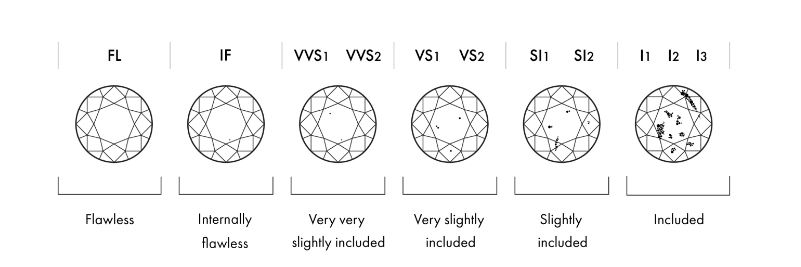

- *Cut* od 0 do 4 za redom [Fair, Good, Very Good, Premium, Ideal]

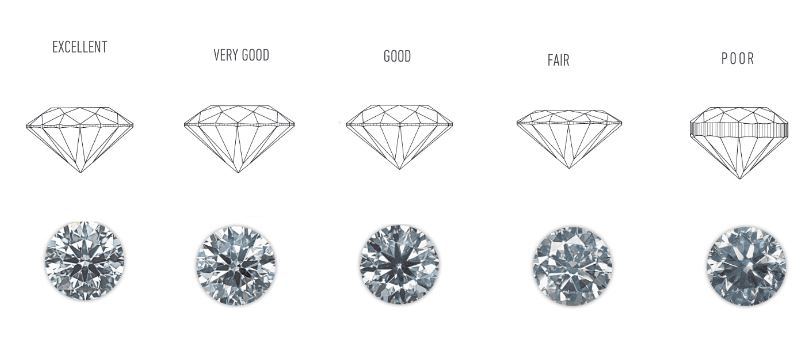

- *Color* od 0 do 6 za redom [D, E, F, G, H, I, J]  

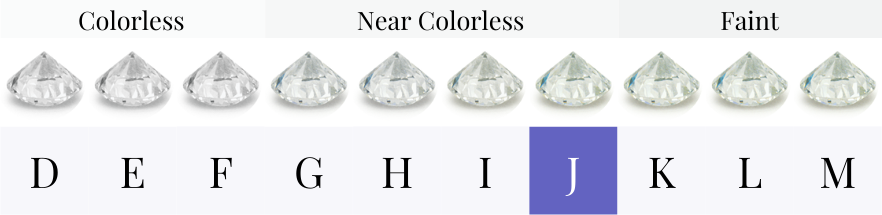

In [15]:
diamonds.isna().any()

carat      False
clarity    False
color      False
cut        False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

Skup podataka ne sadrzi nedostajuce vrednosti

## Vizualizacija skupa podataka

#### Opseg vrednosti

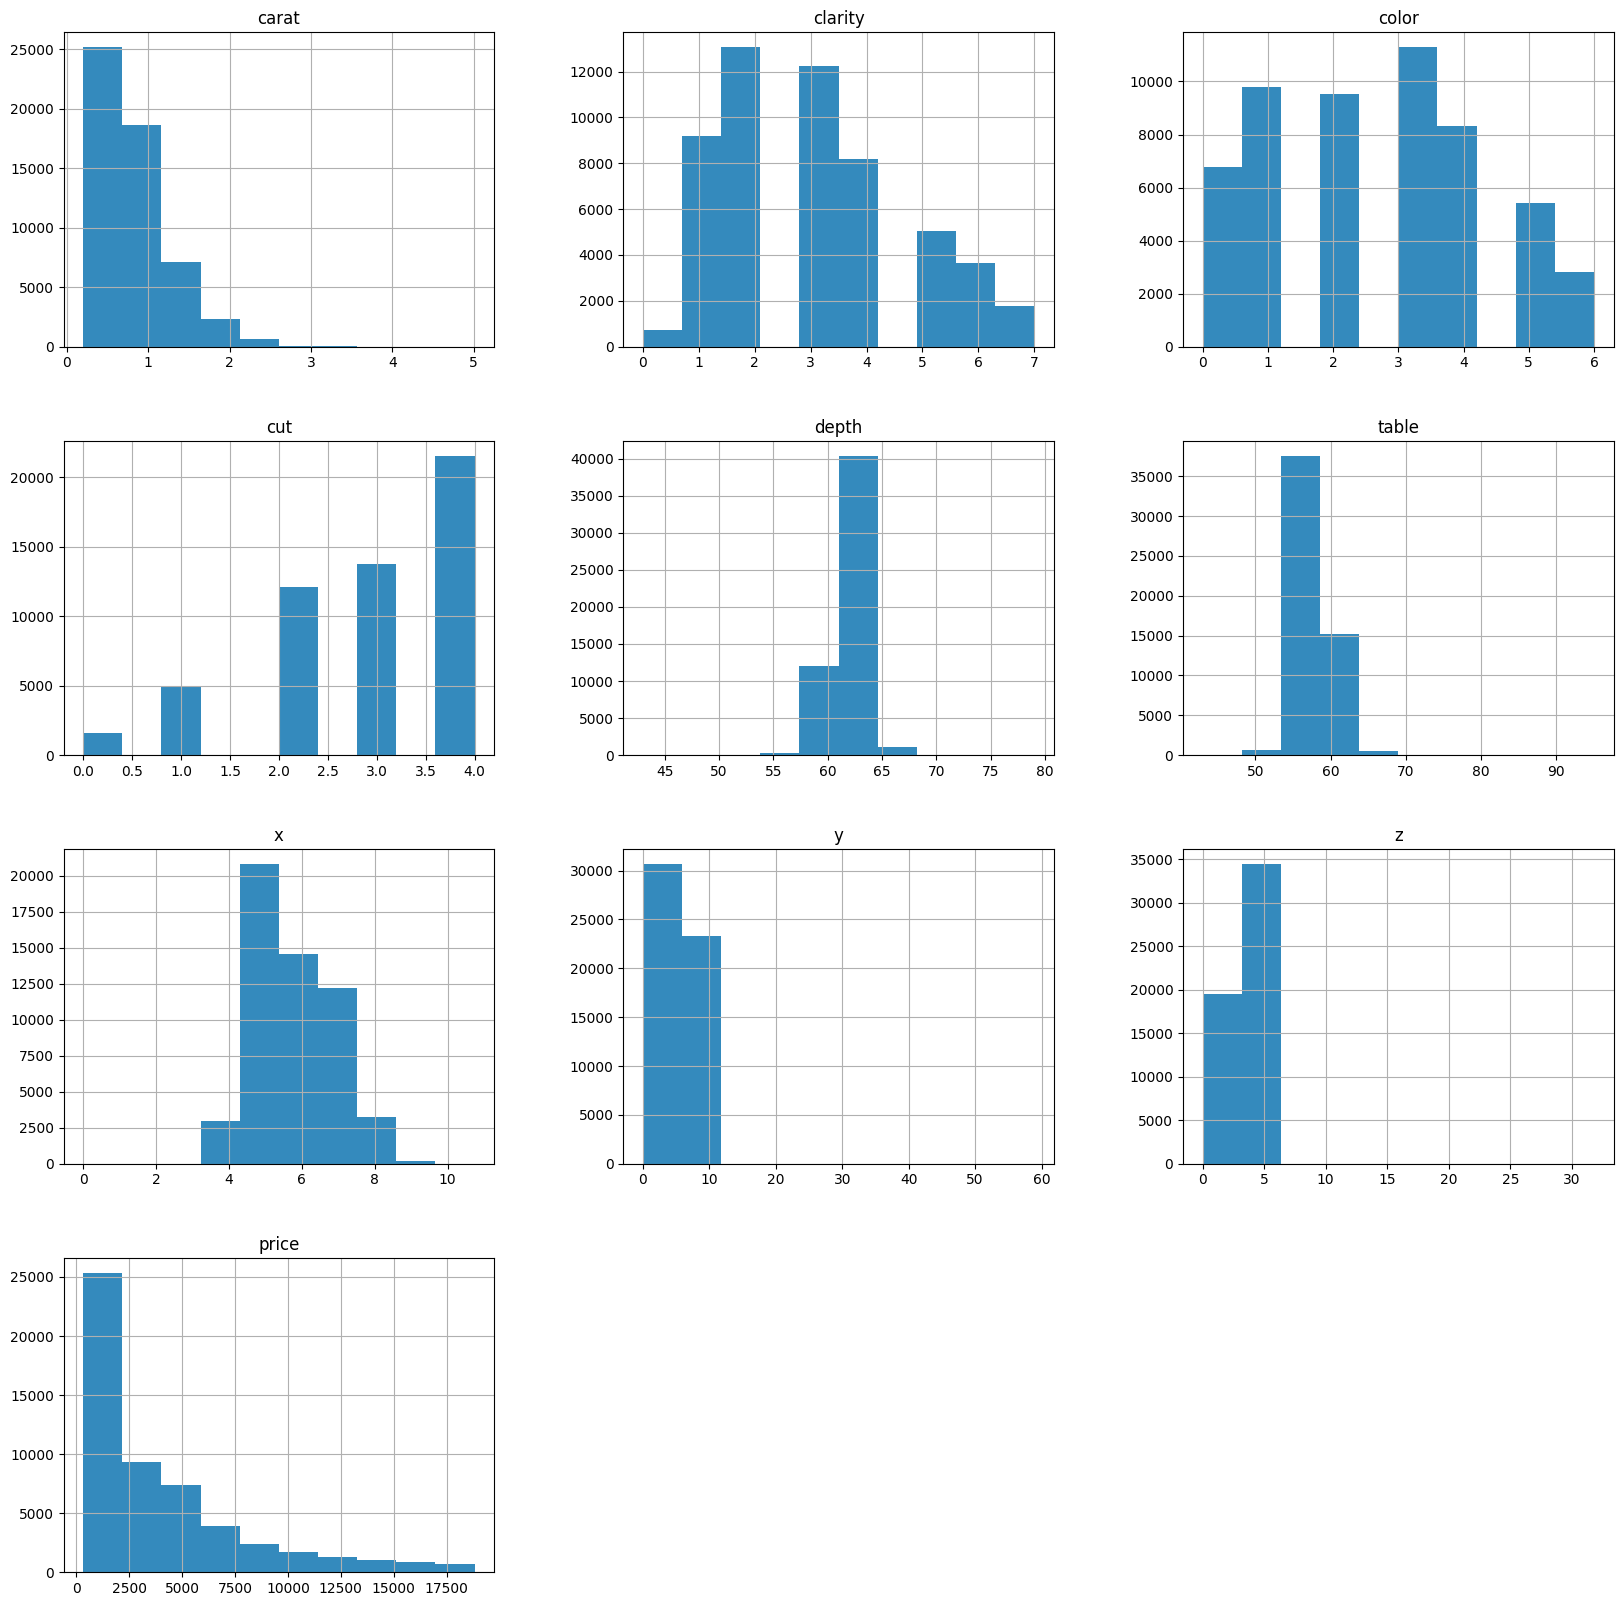

In [16]:
_ = pd.DataFrame.hist(diamonds, column = diamonds.columns, figsize= (20, 20), color= '#348abd')

#### Outlieri

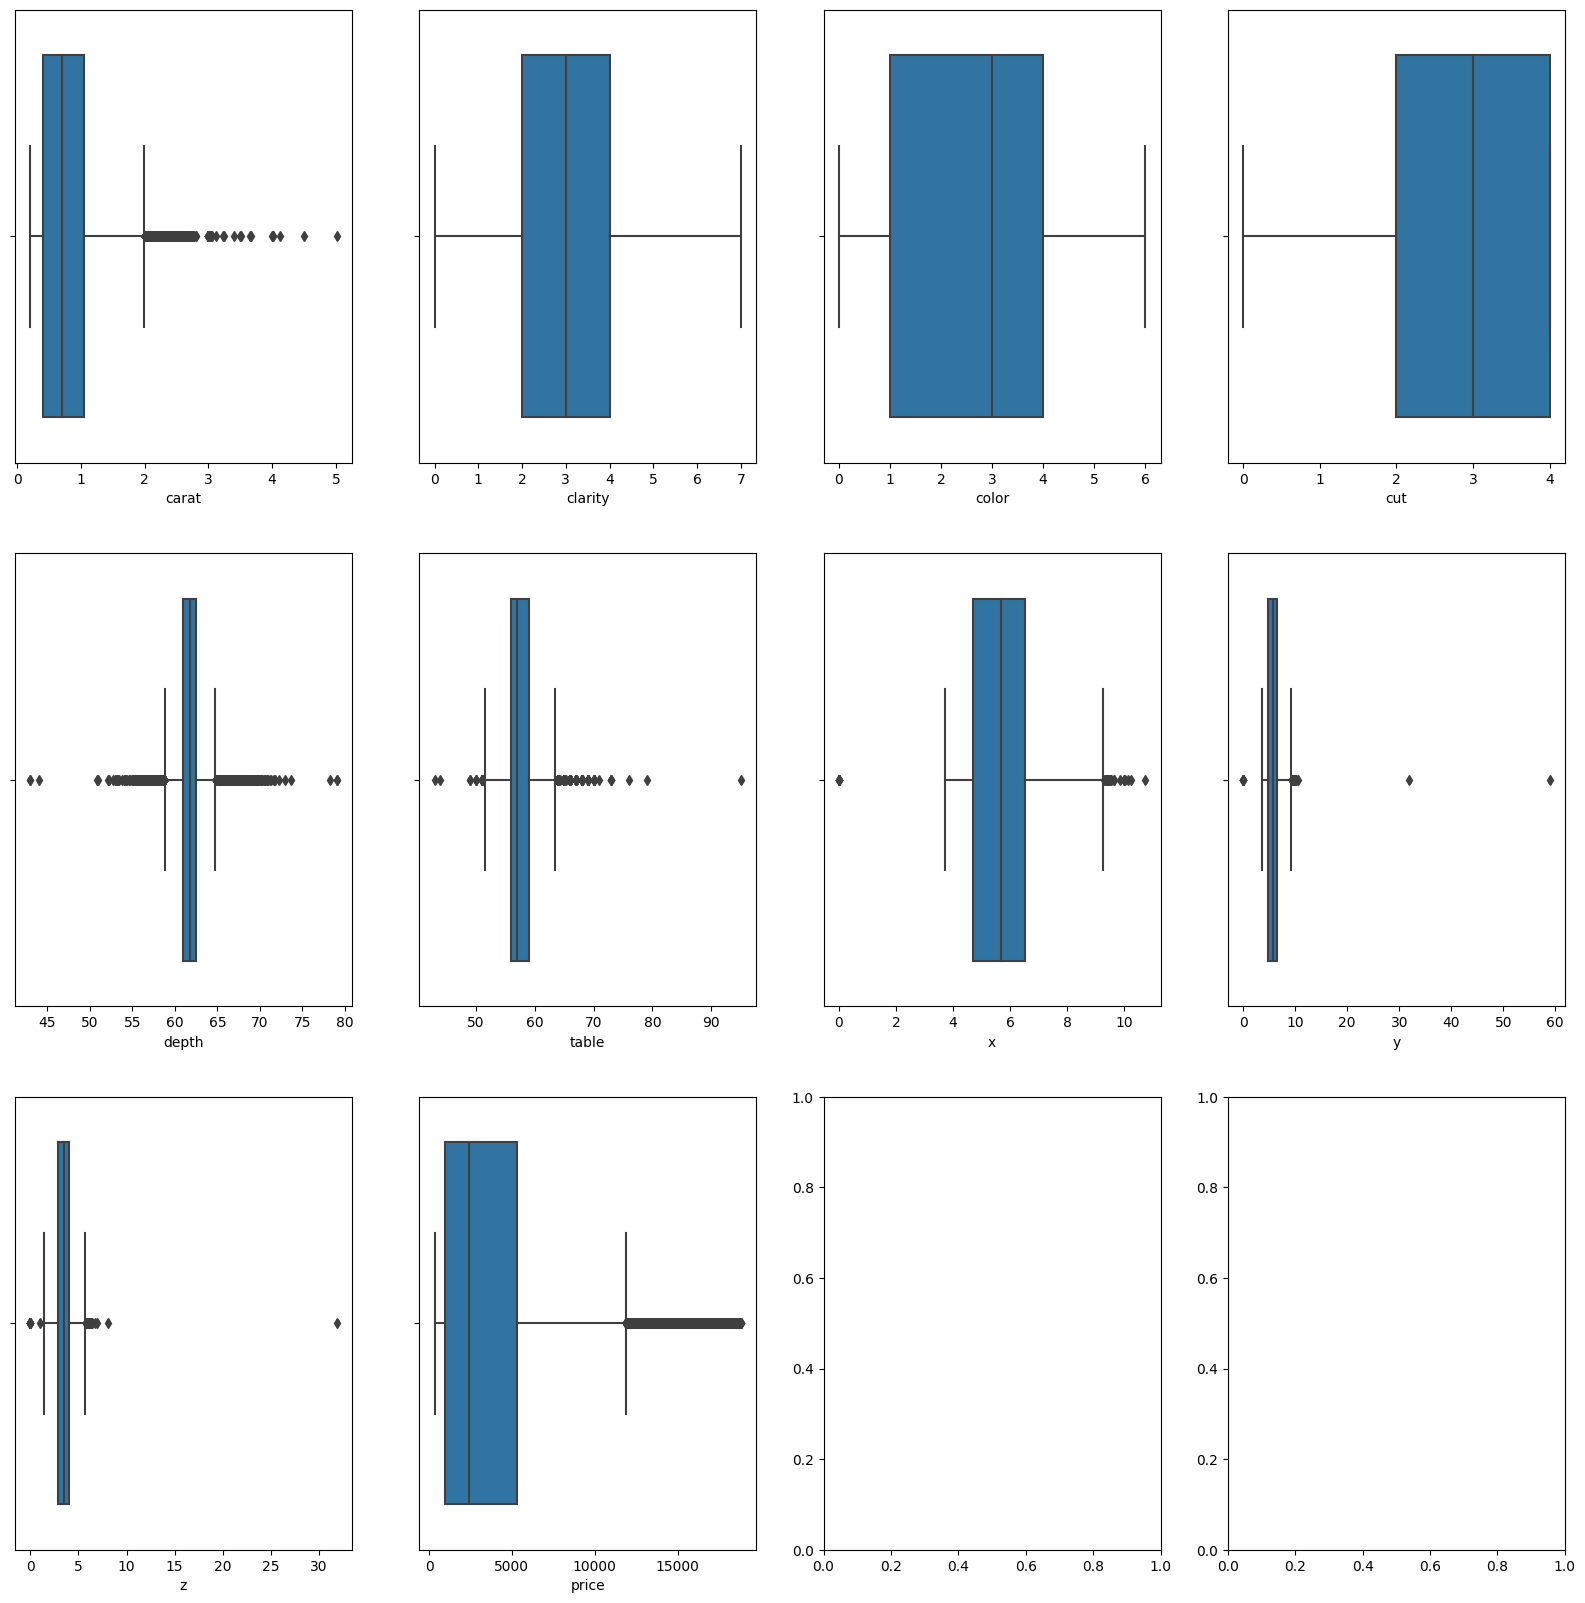

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
for feature, ax in zip(feature_names, axs.ravel()):
  sns.boxplot(x=diamonds[feature], ax=ax)
plt.show()

Primecujemo da svi atributi osim *cut*, *clarity* i *color* imaju **outliere**
Medjutim, necemo ih sve obradjivati.  
S obzirom na brojnost pojedinih outliera izbacicemo samo one kojih ima malo a odskacu puno, do odredjene granice koju cemo kasnije, odrediti pomocu tehnike **z-score**   
Outliere atributa *price* necemo dirati jer ih ima poprilicno i ne znamo koji atribut te instance direktno utice na to odskakanje u ceni

#### Raspodela klasa kvaliteta reza

In [18]:
cutClasses = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [19]:
pieData = diamonds['cut'].value_counts().sort_index(ascending = False)
pieData

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut, dtype: int64

In [20]:
cutClasses.reverse()
cutClasses

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

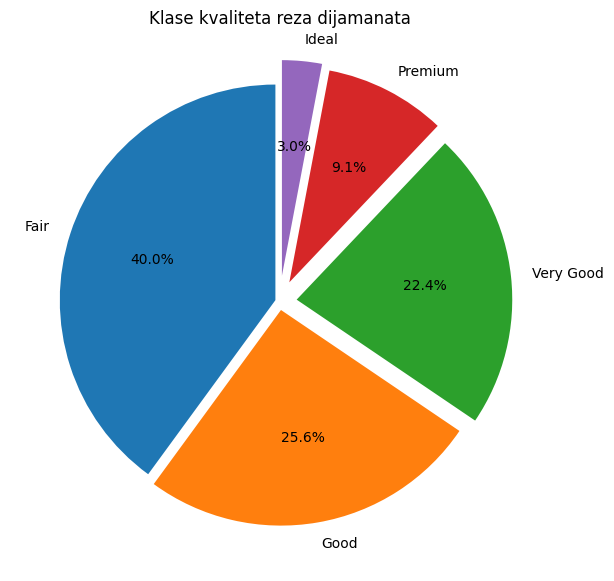

In [21]:
plt.figure(figsize=(7,7))
plt.pie(pieData, labels = cutClasses, startangle= 90, autopct= '%.1f%%', explode = [0.02, 0.04, 0.08, 0.1, 0.12])
plt.title('Klase kvaliteta reza dijamanata')
plt.show()

#### Raspodela klasa kvaliteta boje

In [22]:
colorClasses = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [23]:
pieData = diamonds['color'].value_counts().sort_index()
pieData

0     6775
1     9797
2     9542
3    11292
4     8304
5     5422
6     2808
Name: color, dtype: int64

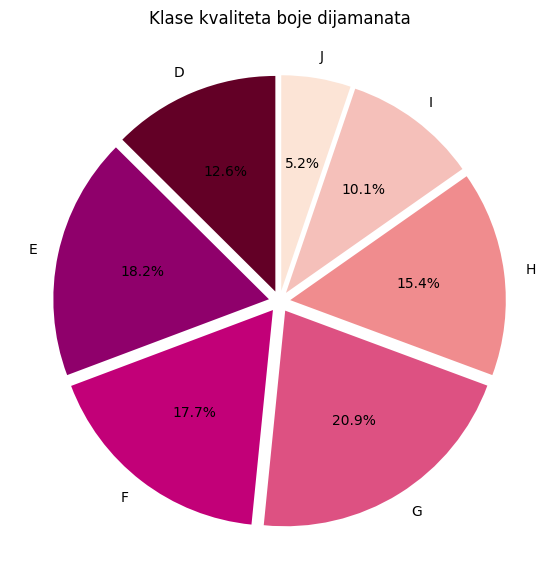

In [24]:
yellow_colors = ['#630026', '#8f006b', '#c20078', '#dd5182', '#f08c8e', '#f5c0ba', '#fce4d6']
plt.figure(figsize=(7,7))
plt.pie(pieData, labels = colorClasses, startangle= 90, autopct= '%.1f%%', explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], colors = yellow_colors)
plt.title('Klase kvaliteta boje dijamanata')
plt.show()

#### Raspodela klasa prozirnosti

In [25]:
clarityClasses = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [26]:
pieData = diamonds['clarity'].value_counts().sort_index()
pieData

0      741
1     9194
2    13065
3    12258
4     8171
5     5066
6     3655
7     1790
Name: clarity, dtype: int64

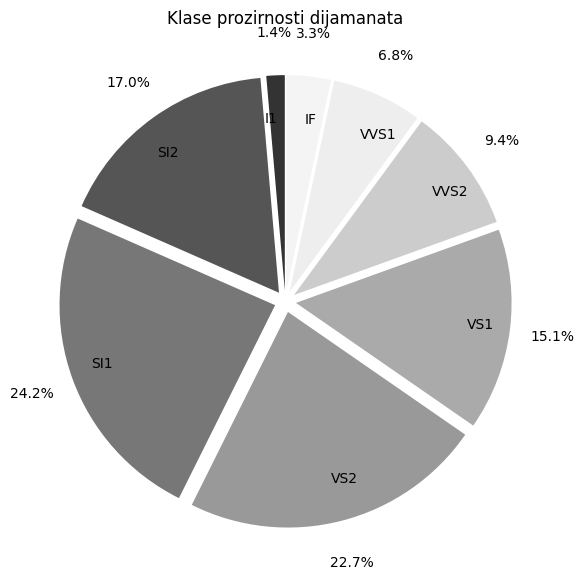

In [27]:
gray_colors = ['#333333', '#555555', '#777777', '#999999', '#aaaaaa', '#cccccc', '#eeeeee', '#f4f4f4']
plt.figure(figsize=(7,7))
plt.pie(pieData, labels = clarityClasses, startangle= 90, autopct= '%.1f%%', explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], labeldistance=0.8, pctdistance=1.2, colors = gray_colors)
plt.title('Klase prozirnosti dijamanata')
plt.show()

***

#### Distribucija cene po kvalitetu reza

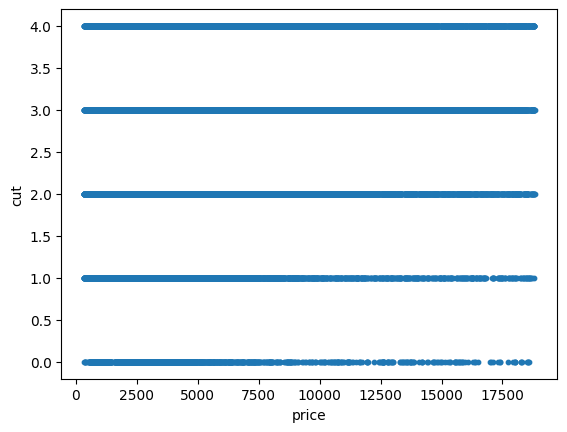

In [28]:
plt.scatter(diamonds['price'], diamonds['cut'], s=10)
plt.xlabel('price')
plt.ylabel('cut')
plt.show()

#### Odnos cene i tezine dijamanata po kvalitetu reza:

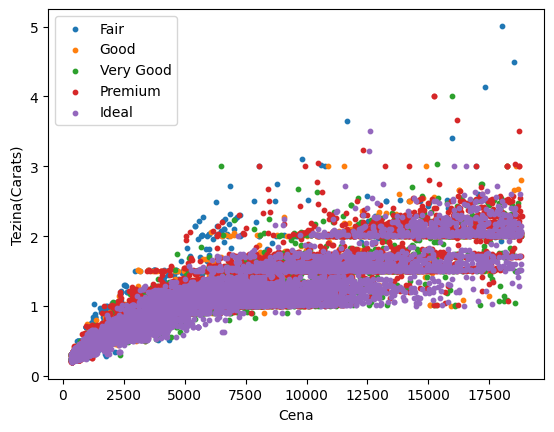

In [29]:
for cutClass in cutClasses:
  c = diamonds.loc[diamonds['cut'] == cutClasses.index(cutClass)]
  plt.scatter(c['price'], c['carat'], s= 10, label= cutClass)
plt.xlabel('Cena')
plt.ylabel('Tezina(Carats)')
plt.legend(loc = 'best')
plt.show()

Radi bolje vizualizacije, prikazacemo i u 3D

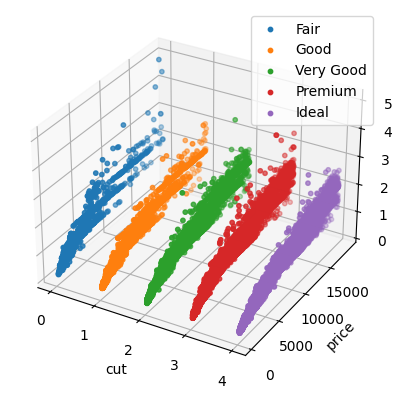

In [30]:
fig, p = plt.subplots(subplot_kw={"projection": "3d"})
for cutClass in cutClasses:
  c = diamonds.loc[diamonds['cut'] == cutClasses.index(cutClass)]
  p.scatter(c['cut'], c['price'], c['carat'], s= 10, label= cutClass)
plt.xlabel('cut')
plt.ylabel('price')
plt.legend(loc = 'best')
plt.show()

In [31]:
d = diamonds.groupby(['cut']).price.agg(['min', 'max', 'mean']).sort_index(ascending= False).join(diamonds.groupby(['cut'])['carat'].mean().sort_index(ascending= False))
fn = ['min', 'max', 'mean', 'avg. carat']
d.columns = fn
d

,min,max,mean,avg. carat
cut,,,,
4,326.0,18806.0,3457.541992,0.702837
3,326.0,18823.0,4584.257324,0.891955
2,336.0,18818.0,3981.760010,0.806381
1,327.0,18788.0,3928.864258,0.849185
0,337.0,18574.0,4358.757812,1.046137


Moze se uociti da kvalitet reza ne utice toliko na cenu, ali tezina (carat) utice poprilicno

****

### Posto ovaj skup podataka spada u regresione probleme nadgledanog ucenja, kako bismo ga sveli na klasifikacioni problem, atribut *price* cemo svesti sa numericke promenljive na kategoricku:  
Imacemo 4 kategorije po opsegu cena (u USD):  
1. [0, 5000] 
2. (5000, 10000]
3. (10000, 15000]
4. 15000+

In [32]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])
  

In [33]:
s = pd.Series(classColumn)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [34]:
diamonds['class'].value_counts()

[0, 5000]         39226
(5000, 10000]      9492
(10000, 15000]     3567
15000+             1655
Name: class, dtype: int64

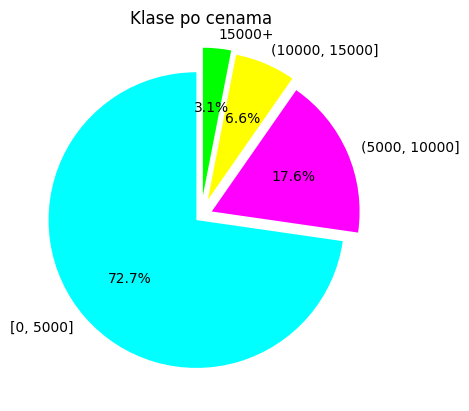

In [35]:
pieData = diamonds['class'].value_counts().sort_values(ascending= False)
plt.pie(pieData, labels= priceClasses, colors=['cyan', 'magenta', 'yellow', 'lime'], autopct= '%.1f%%', startangle= 90, explode= [0.04, 0.08, 0.12, 0.14])
plt.title('Klase po cenama')
plt.show()

Možemo uvideti da su klase poprilično neuravnotežene.  
Pristupi rešavanju ovog problema:  
  
1. Rebalansiranje skupa podataka: Jedan pristup rešavanju problema neuravnoteženosti klasa je da se skup podataka rebalansira. Ovo se može uraditi *oversampling*-om skupa podataka, što podrazumeva ili *oversampling* manjinske klase ili *undersampling* većinske klase. *Oversampling* manjinske klase podrazumeva dupliranje uzoraka iz manjinske klase kako bi se povecala njihova zastupljenost, dok poduzorkovanje većinske klase podrazumeva uklanjanje uzoraka iz većinske klase kako bi se smanjila njihova zastupljenost.

2. Dodela težina: Još jedan pristup je dodeljivanje težina klasama tokom obuke modela. To podrazumeva dodeljivanje većih težina manjinskoj klasi i manjih težina većinskoj klasi. Ovaj pristup može pomoći modelu da obrati više pažnje na manjinsku klasu tokom obuke.

3. Generisanje sintetičkih podataka: Generisanje sintetičkih podataka podrazumeva kreiranje novih uzoraka za manjinsku klasu korišćenjem tehnika poput uvećanja podataka, *SMOTE* ili *GAN*-ova. Ovo može pomoći u povećanju zastupljenosti manjinske klase i smanjenju neuravnoteženosti klasa.

4. Metode ansambla: Metode ansambla podrazumevaju kombinovanje više modela radi poboljšanja performansi. U slučaju neuravnoteženosti klasa, metode ansambla se mogu koristiti za kombinovanje više modela obučenih na različitim rebalansiranim skupovima podataka ili sa različitim dodeljenim težinama klasama.


### Matrica korelacije

In [36]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [37]:
correlation_matrix = diamonds.corr()
correlation_matrix

<ipython-input-37-c86f50b8ccbe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr()


,carat,clarity,color,cut,depth,table,x,y,z,price
carat,1.000000,-0.352841,0.291437,-0.134967,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
clarity,-0.352841,1.000000,0.025631,0.189175,-0.067384,-0.160327,-0.371999,-0.358420,-0.366952,-0.146800
color,0.291437,0.025631,1.000000,-0.020519,0.047279,0.026465,0.270287,0.263584,0.268227,0.172511
cut,-0.134967,0.189175,-0.020519,1.000000,-0.218055,-0.433405,-0.125565,-0.121462,-0.149323,-0.053491
depth,0.028224,-0.067384,0.047279,-0.218055,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.160327,0.026465,-0.433405,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.371999,0.270287,-0.125565,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.358420,0.263584,-0.121462,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,-0.366952,0.268227,-0.149323,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.146800,0.172511,-0.053491,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Na osnovu podataka matrice korelacije mozemo uociti da su neki atributi veoma slicni poput *carat* i *price* sto ukazuje na visoku povezanost ovih kolona  
Moguce je iskoristiti PCA (Principal Component Analysis) koji ce nam redukovati dataset na par dimenzija 

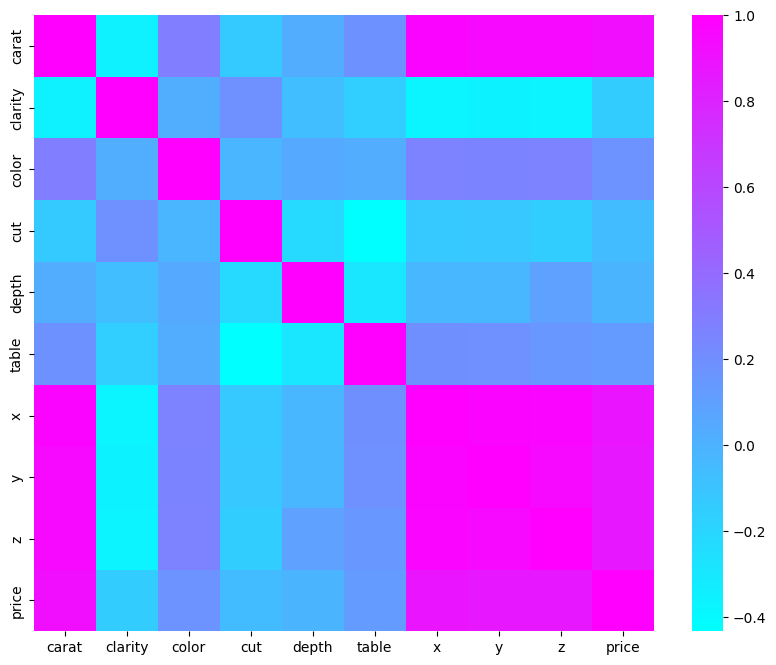

In [38]:
plt.figure(figsize=(10,8))
_ = sns.heatmap(correlation_matrix, xticklabels = correlation_matrix.columns.values, yticklabels = correlation_matrix.columns.values, cmap = plt.cm.cool)

Uocavamo visoku korelaciju izmedju atributa **price**, **x**, **y**, **z**, i **carat**

Sada cemo zameniti numericki atribut *price* sa kategorickim *class*

In [39]:
diamonds.drop(['price'], axis='columns', inplace = True)

In [40]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,"(5000, 10000]"
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,"[0, 5000]"
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,"[0, 5000]"
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,"(5000, 10000]"
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.900002,59.0,6.38,6.41,4.02,"[0, 5000]"
53936,0.93,2,4,3,61.799999,59.0,6.27,6.23,3.86,"[0, 5000]"
53937,0.30,4,5,4,62.400002,54.0,4.30,4.32,2.69,"[0, 5000]"
53938,0.36,3,2,4,61.500000,55.0,4.60,4.57,2.82,"[0, 5000]"


****

Sada mozemo preci dalje, na **preprocessing**